# PhUSE EU Connect 2019 - TT06 (Python)

The goal of this notebook is to perfom certain Statistical Programming tasks with Python

In [1]:
# import all needed libraries
%matplotlib inline
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Import data

With pandas you can seamlessly import many kinds of data (SAS, XPT, CSV, XLS etc.). We will import a SAS dataset and a XLSX spreadsheet.

In [2]:
# import Demograpic data (format = SAS) into a pandas Dataframe 
dm = pd.read_sas('C:\\Users\\ndupuis\\PycharmProjects\\discovering_Pandas\\dm.sas7bdat', encoding = "utf-8")
type(dm)

# import Vital Signs (format = XLSX) into a pandas Dataframe 
vs = pd.read_excel('C:\\Users\\ndupuis\\PycharmProjects\\discovering_Pandas\\vs.xlsx')

## Getting to know your data

Python, especially combined with Jupyter, offers many ways to understand, comprehend and vizualize your data.

In [3]:
# Display a glimpse of the DM dataframe 
dm.head()

,AGEDRV,BRTHCL,BRTHDAT,BRTHDDT,COUNTRY,ETHNICOR,RACEOR,VISIT,SUBJID,QUALIFYV,...,ORIGSITE,RACE,RACESY,REPFLG,SBJINIT,SEX,SITEID,USUBJID,VISITNUM,VISITNU
0,44.0,Y,19690416,19690416,HRV,OTHER,CAUCASIAN,MONTH-1,2105003,NaN,...,2105,CAUCASIAN,NaN,Core,NaN,M,2105,CACZ885M2301_2105003,1.0,10.0
1,75.0,Y,19380819,19380819,RUS,OTHER,CAUCASIAN,MONTH-1,6064014,NaN,...,6064,CAUCASIAN,NaN,Core,VNI,F,6064,CACZ885M2301_6064014,1.0,10.0
2,56.0,Y,19571217,19571217,GTM,HISPANIC OR LATINO,OTHER,MONTH-1,3410007,NaN,...,3410,OTHER,LATINO,Core,RWA,M,3410,CACZ885M2301_3410007,1.0,10.0
3,65.0,Y,19481002,19481002,CAN,OTHER,CAUCASIAN,MONTH-1,1026015,NaN,...,1026,CAUCASIAN,NaN,Core,C-V,F,1026,CACZ885M2301_1026015,1.0,10.0
4,50.0,Y,19630807,19630807,LVA,OTHER,CAUCASIAN,MONTH-1,6109009,NaN,...,6109,CAUCASIAN,NaN,Core,J-U,M,6109,CACZ885M2301_6109009,1.0,10.0


In [4]:
# How many rows/cols
display("DM = " + str(dm.shape[0]) + " rows, " + str(dm.shape[1]) + " columns")

'DM = 17482 rows, 38 columns'

In [5]:
# More info on DM (index, memory, data types)
dm.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17482 entries, 0 to 17481
Columns: 38 entries, AGEDRV to VISITNU
dtypes: datetime64[ns](3), float64(7), object(28)
memory usage: 5.1+ MB


In [6]:
# list all the DM columns
dm.columns

Index(['AGEDRV', 'BRTHCL', 'BRTHDAT', 'BRTHDDT', 'COUNTRY', 'ETHNICOR',
       'RACEOR', 'VISIT', 'SUBJID', 'QUALIFYV', 'REPEATSN', 'STUDYID',
       'SUBEVE', 'ACCESSTS', 'ACTEVENT', 'AGECLU', 'BRTHYR', 'DCMNAME',
       'DCMSUBNM', 'DOCNUM', 'DOMAIN', 'EPOCH', 'ETHNIC', 'INITCL', 'INV',
       'INVSITE', 'LOGINTS', 'LSTCHGTS', 'ORIGSITE', 'RACE', 'RACESY',
       'REPFLG', 'SBJINIT', 'SEX', 'SITEID', 'USUBJID', 'VISITNUM', 'VISITNU'],
      dtype='object')

In [7]:
# Display distinct values in column RACE
list(dm.RACE.unique())

['CAUCASIAN',
 'OTHER',
 'BLACK',
 'NATIVE AMERICAN',
 'ASIAN',
 'UNKNOWN',
 'PACIFIC ISLANDER']

In [8]:
# Frequency count on the column RACE (reset_index outputs to a pd.Dataframe)
dm.groupby(['RACE']).size()

RACE
ASIAN                2495
BLACK                 553
CAUCASIAN           13436
NATIVE AMERICAN       401
OTHER                 570
PACIFIC ISLANDER        7
UNKNOWN                20
dtype: int64

In [9]:
# Display some descriptive statistics on the age variable
dm["AGEDRV"].describe()

count    17482.000000
mean        61.432216
std         10.229728
min         26.000000
25%         55.000000
50%         62.000000
75%         69.000000
max         94.000000
Name: AGEDRV, dtype: float64

In [10]:
# average age, by gender (stored in a pd.Series)
avg = dm.groupby('SEX')['AGEDRV'].mean()
avg

SEX
F    63.176429
M    60.877723
Name: AGEDRV, dtype: float64

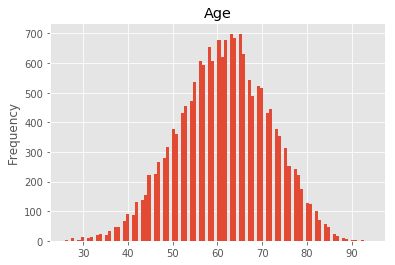

In [11]:
# Plot age frequency using Pandas
dm['AGEDRV'].plot(kind='hist', bins=100, title='Age');

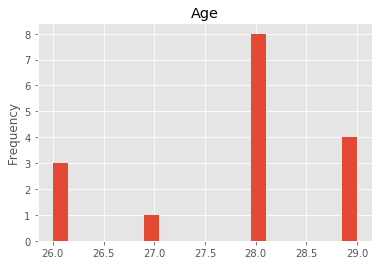

In [12]:
# Same plot, but with a filter on data first, to take a closer look at the young ones
young = dm[dm['AGEDRV'] < 30]
young['AGEDRV'].plot(kind='hist', bins=20, title='Age');

In [15]:
# Use a more meaningful index for DM (USUBJID is the unique key variable)
#dm.set_index(pd.Index(dm['USUBJID']), inplace = True)
#dm.loc["CACZ885M2301_1025029":"CACZ885M2301_1025029"]

## Data cleaning and preparation

Data usually needs some cleaning and transformation before we can really start working on it: handling missings and duplicates, filtering, data issues etc. Once again, Python offers many high-level methods to achieve this.

In [ ]:
# List of columns. Huh oh, that doesn't look very standard...
vs.columns

In [ ]:
# Keep only certain columns, rename them, sort dataframe and display 
vs = vs[["NPNO", "Vital Signs Test Name", "Visit Number", "VSDAT", "Result or"]]
vs.columns = ["ID", "VSname", "Visit", "VSdate", "VSres"]
vs.sort_values(by=["ID", "VSname", "Visit"], inplace = True)
vs.head()

In [ ]:
# search for duplicates 
duplicates = dm.groupby("USUBJID").size().reset_index(name='counts')
if (duplicates[duplicates["counts"] > 1].count()[0] > 0) :
    print ("WARNING: I found duplicates in DM!")
    display (duplicates[duplicates["counts"] > 1])
else:
    print("Good news, no duplicates found in DM.") 

In [ ]:
# same but with a function, using iterable
unique_key = {"dm" : ["USUBJID"], "vs":["ID", "VSname", "Visit"]}
def duplicates (domains):
    for domain in domains:
        keys = unique_key[domain]
        duplicates = eval(domain).groupby(keys).size().reset_index(name='counts')
        if (duplicates[duplicates["counts"] > 1].count()[0] > 0) :
            print ("WARNING: I found duplicates in " + domain)
            display (duplicates[duplicates["counts"] > 1])
        else:
            print("Good news, no duplicates found in " + domain) 

duplicates(["dm", "vs"])            

In [ ]:
# Test the function by introducing duplicates in DM. Keep it tidy.
dm_ori = dm
dm = dm.append(dm.loc[1])
duplicates(["dm"])  
dm = dm_ori
del dm_ori

In [ ]:
# remove missing ID values 
rows = vs.shape[0]
vs.dropna(subset=['ID'], inplace = True)
if (rows - vs2.shape[0]) > 0:
    print ("WARNING: I removed " + str(rows - vs2.shape[0]) + " rows due to missing ID, i.e. 'None' or 'NaN'.")

## Data wrangling

Join, combine, reshape

In [ ]:
# create baseline
baseline = vs[vs["Visit"] ==  1.0].drop(['Visit', 'VSdate'], axis=1)
baseline = baseline.rename(columns={'VSres': 'Baseline'})
baseline.head()

In [ ]:
# calculate change from baseline
vs = pd.merge(vs, baseline, on = ["ID", "VSname"], how="left")
vs["Chg"] = vs.apply(lambda row: row['VSres'] - row['Baseline'] if row['Visit'] > 1.0 else np.nan, axis=1)
vs.head(10)

## Misc

In [ ]:
def flagBaseline(data, baselineCriteria, baseline_flag="bsl"):
    data[baseline_flag] = data.apply(lambda row: "Y" if row['Visit'] == 1 else "N", axis=1)  # cheating for now

# method to derive a change from baseline for a specific paramater.
def changeFromBaseline(data, var, groupby, baselineCriteria, newvar = "chgBsl", baseline_flag="bsl"):

    # create baseline flag
    flagBaseline(data=data, baselineCriteria=baselineCriteria, baseline_flag=baseline_flag)    
    
    # Keep baseline records
    baseline = data[vs[baseline_flag] == "Y"]

    # keep only needed columns
    baseline = baseline[groupby + [var]]

    # rename 'var' into 'Baseline'
    baseline = baseline.rename(columns={var: '__temp'})
    
    # merge the baseline back to the original dataframe
    data = pd.merge(data, baseline, on=groupby, how="left")

    # derive change from baseline
    data[newvar] = data.apply(lambda row: row[var] - row['__temp'] \
                                     #if (row[baseline_flag] == "N" and row[var] != np.nan and row['__temp'] != np.nan) \
                                     if (row[baseline_flag] == "N" and \
                                         str(row[var]).isnumeric() and \
                                         str(row["__temp"]).isnumeric()) \
                                     else np.nan, axis=1)
    
    return data.drop('__temp', axis=1) 

In [ ]:
vs = changeFromBaseline(data=vs, var = "VSres", groupby = ["ID", "VSname"], baselineCriteria='vs["Visit"] ==  1.0')
vs.head(20)

In [ ]:
# function to derive the last observation carried forward, in case a value if missing. 
def locf(data, var, groupby):
    
    
    